In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

## Abstract

Este proyecto se basa en un análisis de las emisiones de dióxido de carbono (CO2) vinculadas a la industria agroalimentaria, que desempeña un papel crucial al contribuir con el 62% de las emisiones globales de CO2. El objetivo primordial radica en anticipar las emisiones a futuro de CO2 y determinar si influye o no en el cambio climático. Para alcanzar este propósito, se enfoca en dos variables fundamentales: las emisiones totales de CO2, representada por el label 'total_emission', y la temperatura promedio, representada por el label, 'Average Temperature °C'.

La adopción de estas variables persigue generar una comprensión más a fondo y efectiva de la dinámica de emisiones en el ámbito agroalimentario y su relación con los cambios climáticos. Se busca identificar patrones y relaciones entre las emisiones y las variaciones térmicas. A partir de estos hallazgos, se aspira a plantear y descubrir vías potenciales de mitigación, delineando acciones concretas que puedan contribuir a abordar eficazmente esta problemática ambiental.

La metodología involucra análisis estadísticos avanzados y técnicas de modelado predictivo, aprovechando herramientas de Machine Learning para anticipar los futuros escenarios de emisiones de CO2. Este análisis se muestra como un instrumento importante para estimar los efectos del aumento de emisiones en el sistema climático global y orientar la toma de decisiones informadas.

Este proyecto persigue comprender y proyectar las emisiones de CO2 en la industria agroalimentaria, a la vez que busca conceder mayores herramientas a los tomadores de decisiones con información crucial para encarar desafíos ambientales críticos y fomentar prácticas que tengan como objetivo un futuro sostenible.

## Carga del Dataset y exploración de datos

In [47]:
agro = pd.read_csv('C:\\Users\\valen\\OneDrive\\Escritorio\\archive (1)\Proyecto 1-Agro_Emissions\\Agrofood_co2_emission.csv')
agro.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [48]:
agro.shape

(6965, 31)

In [49]:
agro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [5]:
agro.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


In [51]:
agro['Total Population']=agro['Total Population - Female']+agro['Total Population - Male'] #Calculamos la población total

In [50]:
agro['Average Temperature']=agro['Average Temperature °C']*10 #Multiplicamos *10 para obtener datos más reales y manejables

In [52]:
#Creamos una nueva columna para asignar un continente por el país indicado en la columna Area

Continent ={
    'Africa': ['Algeria', 'Ethiopia PDR', 'Mayotte','American Samoa', 'United Republic of Tanzania', 'Western Sahara','Sudan (former)','Sao Tome and Principe','Democratic Republic of the Congo','Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Micronesia (Federated States of)', 'Viet Nam', 'Wallis and Futuna Islands','Tokelau','Republic of Korea', 'Syrian Arab Republic','New Caledonia', 'Niue','Iran (Islamic Republic of)', "Lao People's Democratic Republic",'Czech,oslovakia', "Democratic People's Republic of Korea",'China, Hong Kong SAR', 'China, Macao SAR', 'Cook Islands', 'China, mainland', 'China, Taiwan Province of','Armenia', 'Brunei Darussalam', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Holy See','Czechia', 'Czechoslovakia','Netherlands Antilles (former)','United Kingdom of Great Britain and Northern Ireland','Netherlands (Kingdom of the)', 'Serbia and Montenegro','Russian Federation','Republic of Moldova','French Polynesia', 'Isle of Man','Gibraltar','Faroe Islands','Channel Islands','British Virgin Islands','Belgium-Luxembourg','Anguilla','Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North and Center America': ['Antigua and Barbuda', 'Puerto Rico', 'United States of America', 'United States Virgin Islands','Saint Helena, Ascension and Tristan da Cunha', 'Turks and Caicos Islands','Saint Pierre and Miquelon','Northern Mariana Islands', 'Pacific Islands Trust Territory','Montserrat','Martinique','Greenland', 'Guadeloupe', 'Guam','Cayman Islands','Bermuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Falkland Islands (Malvinas)', 'Venezuela (Bolivarian Republic of)','Aruba', 'Bolivia (Plurinational State of)', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

In [53]:
def assign_continent(country):
    for continent, countries in Continent.items():
        if country in countries:
            return continent
    return None

In [54]:
agro["Continent"] = agro["Area"].apply(assign_continent)

In [55]:
agro.shape

(6965, 34)

## Limpieza del Dataset

In [56]:
agro= agro.drop(['Average Temperature °C'],axis=1) #Eliminamos columna duplicada

In [57]:
pd.set_option('display.max_rows', None)
serie = (agro.isnull().sum()/agro.shape[0])*100
serie = serie.sort_values(ascending=False)
serie = serie[serie>0]
serie

Crop Residues                      19.942570
On-farm energy use                 13.725772
Manure applied to Soils            13.323762
Manure Management                  13.323762
IPPU                               10.667624
Forestland                          7.078248
Net Forest conversion               7.078248
Food Household Consumption          6.791098
Fires in humid tropical forests     2.225413
Forest fires                        1.335248
Savanna fires                       0.445083
Continent                           0.057430
dtype: float64

<Axes: >

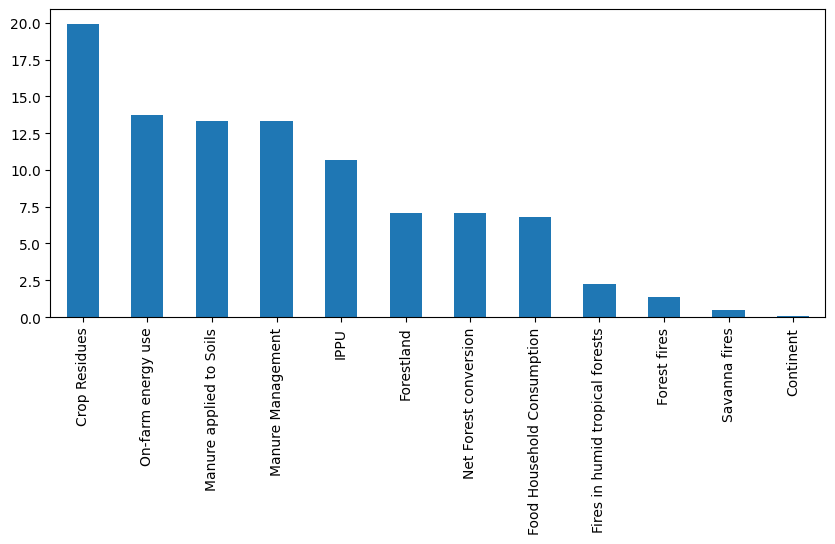

In [14]:
fig, ax= plt.subplots(figsize=(10,4))
serie.plot(kind='bar')

<Axes: >

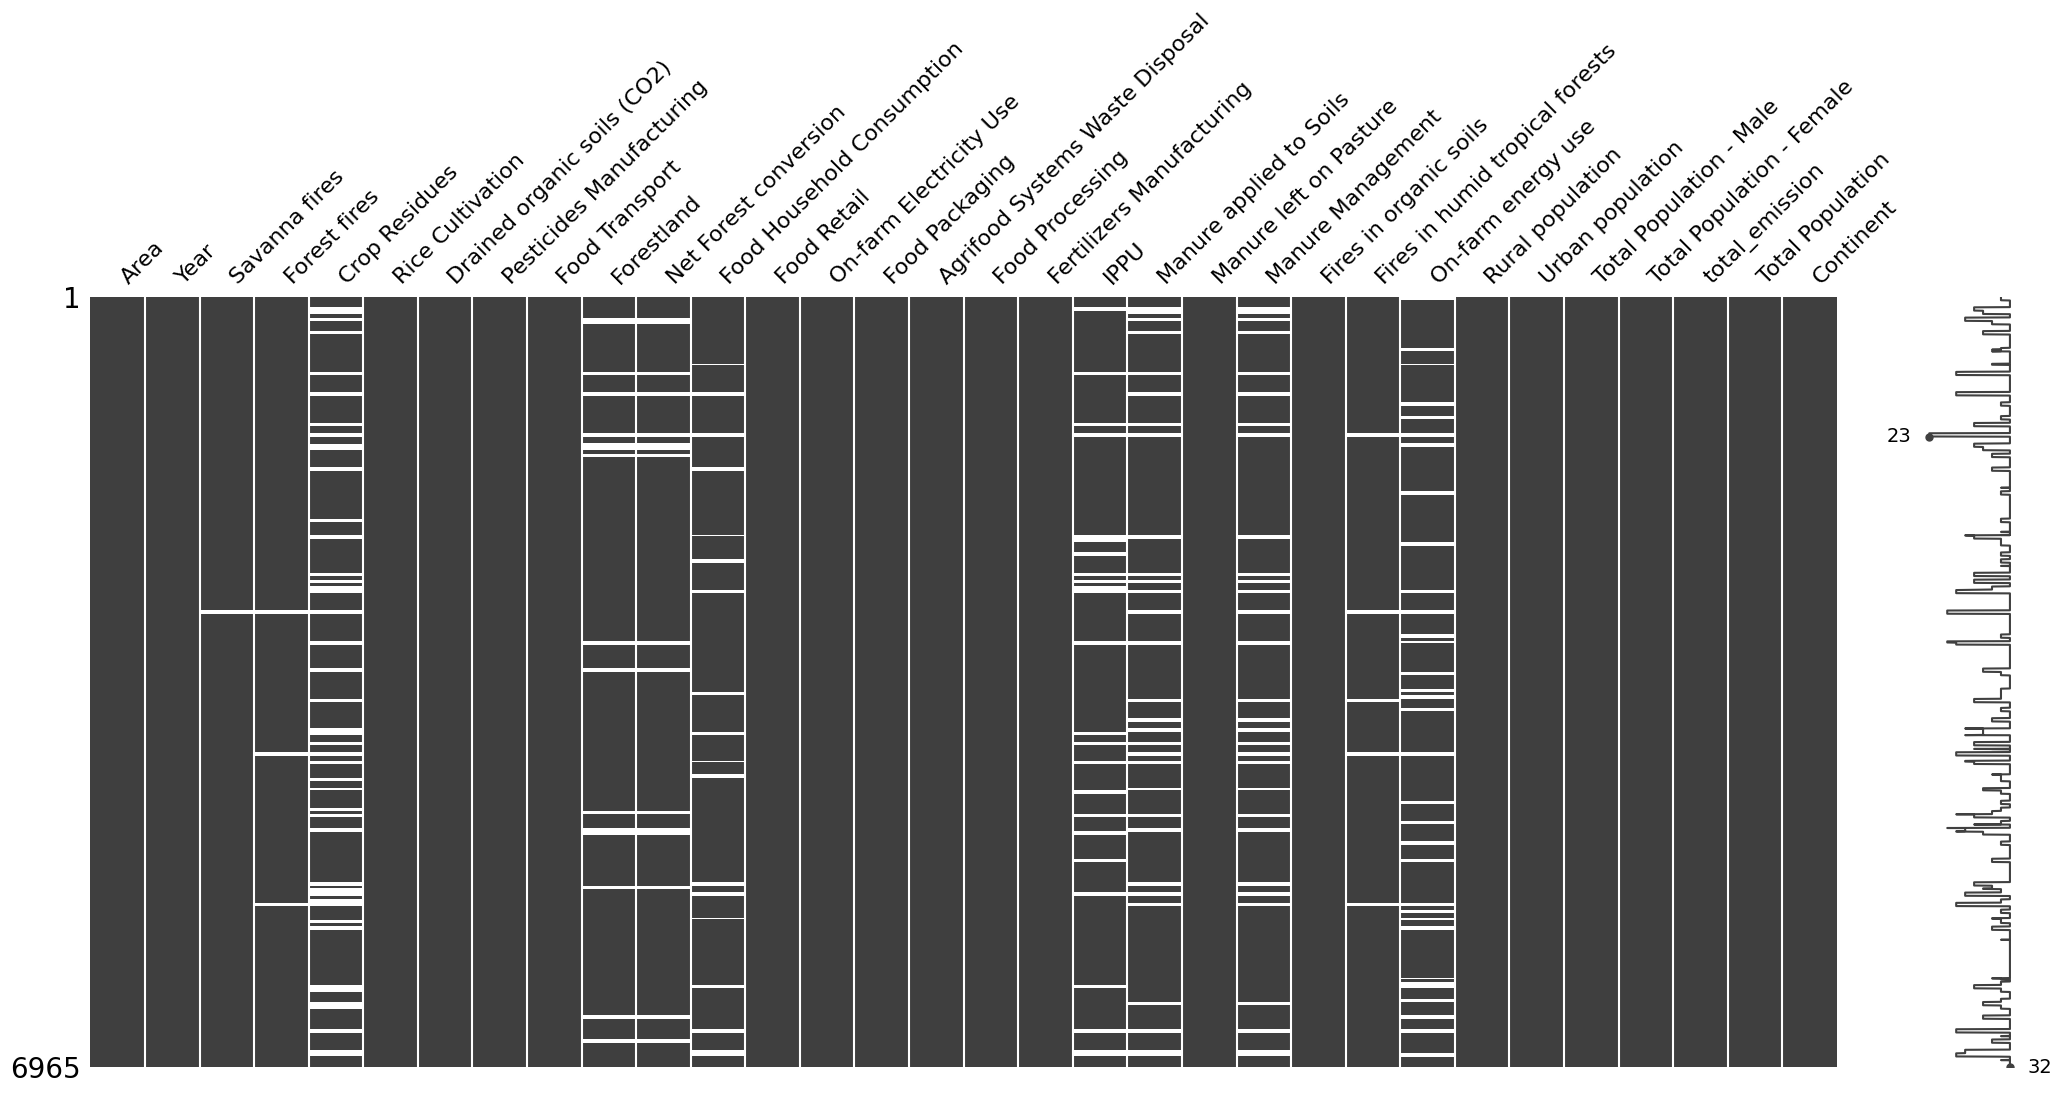

In [15]:
msno.matrix(agro)

<Axes: >

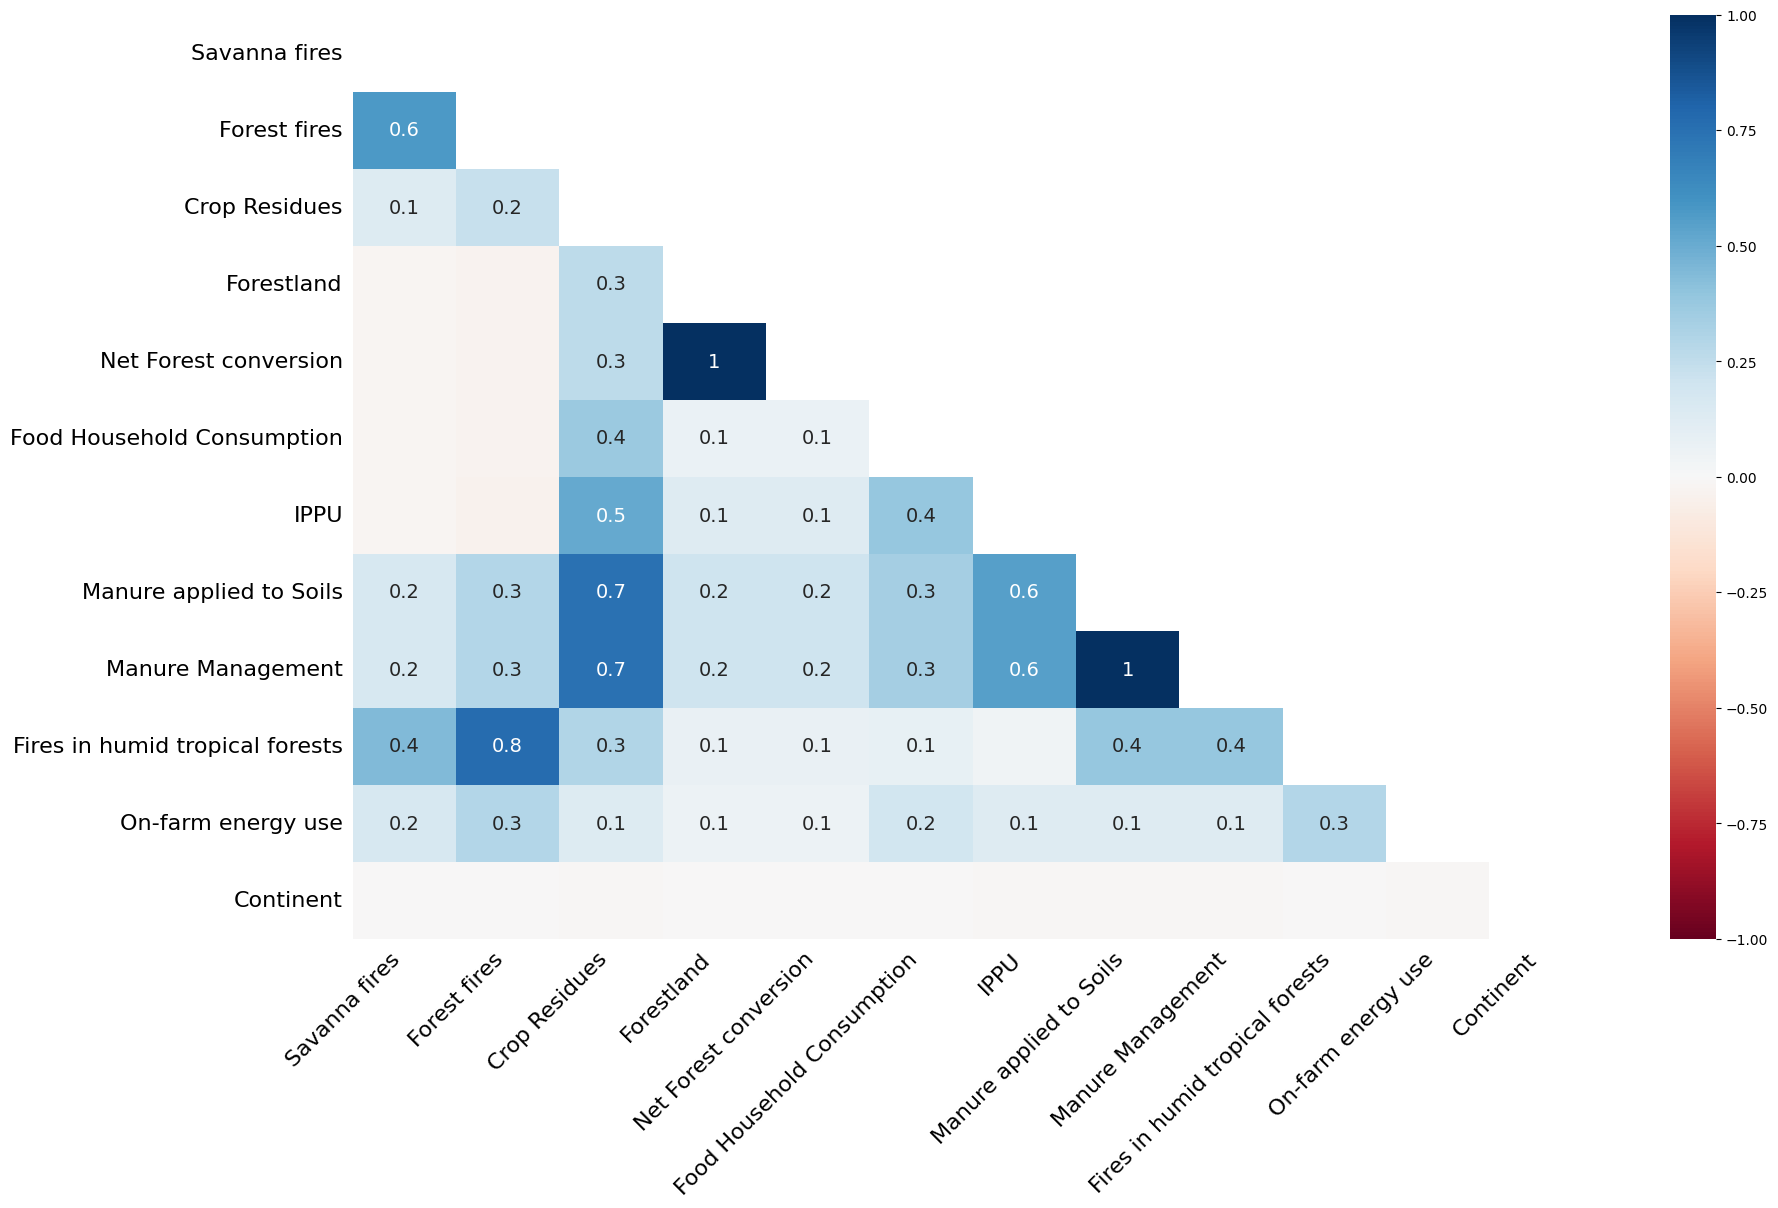

In [16]:
msno.heatmap(agro)

<Axes: >

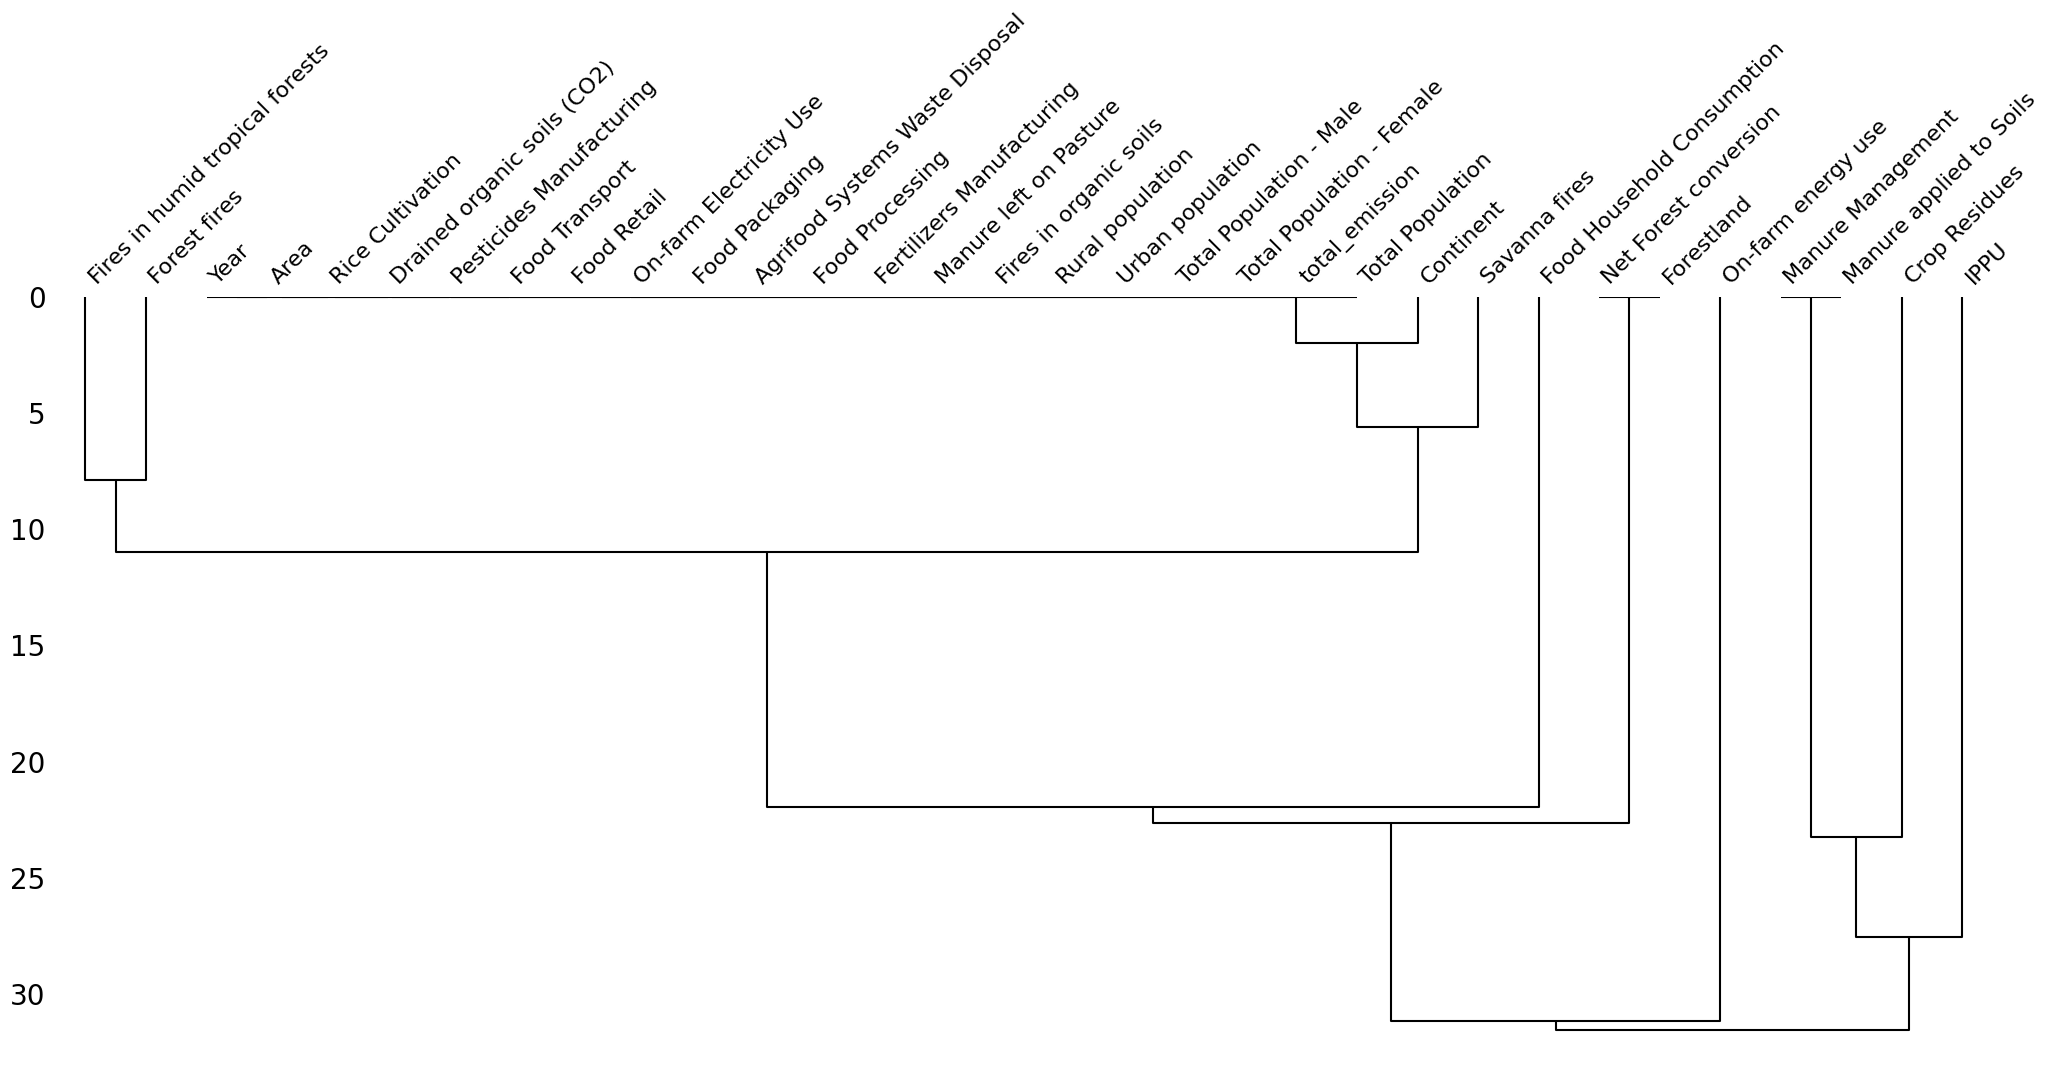

In [17]:
msno.dendrogram(agro)

In [18]:
agro.Continent.isnull().sum()

4

In [19]:
agro.Forestland.isnull().sum()

493

In [20]:
agro['Crop Residues'].isnull().sum()

1389

In [21]:
agro['On-farm energy use'].isnull().sum()

956

In [22]:
agro['Manure Management'].isnull().sum()

928

In [23]:
agro['Manure applied to Soils'].isnull().sum()

928

In [24]:
agro.IPPU.isnull().sum()

743

In [25]:
agro['Net Forest conversion'].isnull().sum()

493

In [26]:
agro['Food Household Consumption'].isnull().sum()

473

In [27]:
agro['Fires in humid tropical forests'].isnull().sum()

155

In [28]:
agro['Forest fires'].isnull().sum()

93

In [29]:
agro['Savanna fires'].isnull().sum()

31

In [30]:
agro.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Total Population
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,3.494410e+07
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,1.485462e+08
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,5.200000e+02
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,4.081450e+05
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,4.895243e+06
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.817757e+07
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,1.456928e+09


In [58]:
col_delete= ['Crop Residues','On-farm energy use','Manure applied to Soils','Manure Management','IPPU'] #columnas a borrar
col_median= ['Savanna fires','Forest fires','Fires in humid tropical forests'] #columnas para agregar con la mediana
col_mean= ['Forestland','Net Forest conversion','Food Household Consumption'] #columnas a completar con la media

In [59]:
for i in col_mean:
    agro[i]= agro[i].fillna(agro[i].mean())

In [60]:
for i in col_median:
    agro[i]= agro[i].fillna(agro[i].median())

In [61]:
agro = agro.drop(labels=col_delete, axis=1)

In [62]:
agro= agro.dropna(axis=0) #Eliminamos las 4 filas de los 4 datos faltantes de la columna Continent

In [36]:
agro.shape

(6961, 27)

In [63]:
#Verificamos que no hayan columnas con datos faltantes

pd.set_option('display.max_rows', None)
serie = (agro.isnull().sum()/agro.shape[0])*100
serie = serie.sort_values(ascending=False)
serie = serie[serie>0]
serie

Series([], dtype: float64)

## Conversión de Columna Continent en datos Dummies

In [64]:
letter = {
    'a': ['Africa'],
    'b': ['Asia'],
    'c': ['North and Center America'],
    'd': ['Oceania'],
    'e': ['Europe'],
    'f': ['South America'],
}

In [65]:
def assign_letter(continent, letter_dict):
    for letter, continents in letter_dict.items():
        if continent in continents:
            return letter
    return None

In [66]:
agro["Letter"] = agro["Continent"].apply(lambda x: assign_letter(x, letter))

In [67]:
agro= pd.get_dummies(agro, columns=['Letter'])

In [68]:
agro.head()

,Area,Year,Savanna fires,Forest fires,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,total_emission,Average Temperature,Total Population,Continent,Letter_a,Letter_b,Letter_c,Letter_d,Letter_e,Letter_f
0,Afghanistan,1990,14.7237,0.0557,686.00,0.0,11.807483,63.1152,-2388.803,0.0,...,2198.963539,5.361667,10694796.0,Asia,False,True,False,False,False,False
1,Afghanistan,1991,14.7237,0.0557,678.16,0.0,11.712073,61.2125,-2388.803,0.0,...,2323.876629,0.206667,10745167.0,Asia,False,True,False,False,False,False
2,Afghanistan,1992,14.7237,0.0557,686.00,0.0,11.712073,53.3170,-2388.803,0.0,...,2356.304229,-2.595833,12057433.0,Asia,False,True,False,False,False,False
3,Afghanistan,1993,14.7237,0.0557,686.00,0.0,11.712073,54.3617,-2388.803,0.0,...,2368.470529,1.019167,14003760.0,Asia,False,True,False,False,False,False
4,Afghanistan,1994,14.7237,0.0557,705.60,0.0,11.712073,53.9874,-2388.803,0.0,...,2500.768729,3.722500,15455554.0,Asia,False,True,False,False,False,False


# Visualizaciones

* ¿La temperatura promedio ha aumentado con los años o disminuyó?

In [72]:
agro_group = agro.groupby('Year').mean('Average Temperature')['Average Temperature']

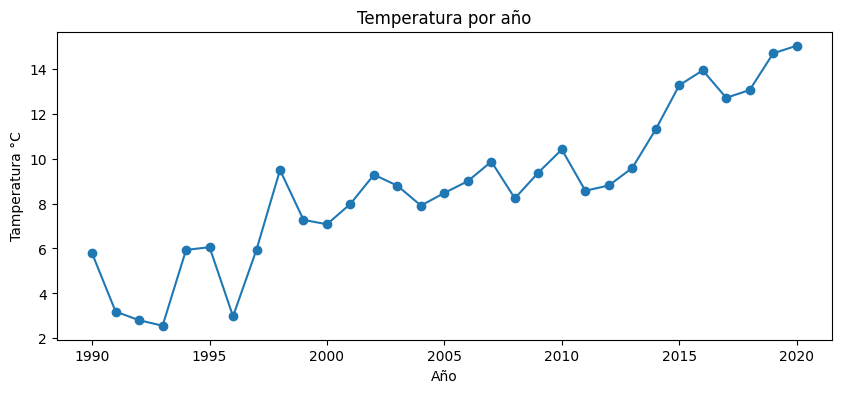

In [73]:
fig, ax = plt.subplots(figsize=(10,4))
x = agro_group.index
y = agro_group.values
ax.plot(x,y, marker='o')
ax.set_xlabel('Año')
ax.set_ylabel('Tamperatura °C')
ax.set_title('Temperatura por año')
plt.grid(False)

Es evidente cómo la temperatura ha experimentado un aumento gradual a lo largo de los años.

* ¿Las emisiones de CO2 han aumentado, disminuido o se han mantenido estables en los últimos años?

In [76]:
agro_group = agro.groupby('Year').mean('total_emission')['total_emission']

Text(0.5, 1.0, 'Emisiones de CO2 por año')

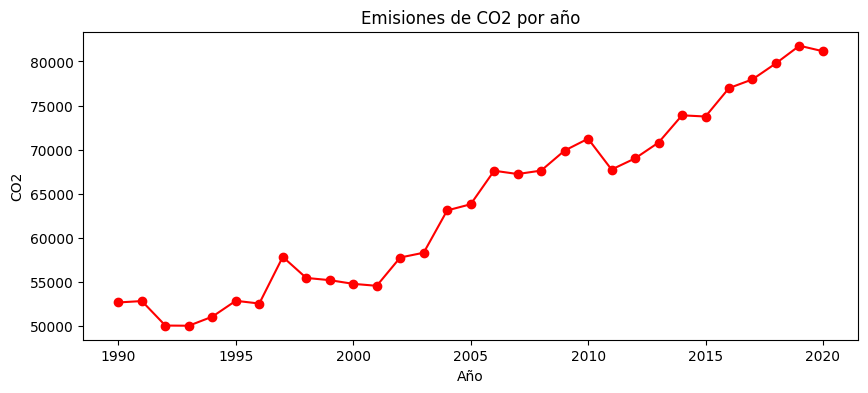

In [77]:
fig, ax = plt.subplots(figsize=(10,4))
x = agro_group.index
y = agro_group.values
ax.plot(x,y,color='r', marker='o')
ax.set_xlabel('Año')
ax.set_ylabel('CO2')
ax.set_title('Emisiones de CO2 por año')


Al igual que la temperatura, podemos evidenciar que las emisiones de CO2 han aumentando con el pasar de los años y presentan una tendencia a la alza.

* ¿Cuál es el continente que más aporta con emisiones de CO2 a lo largo de los años?

In [79]:
emisiones_contiente = agro.groupby('Continent').mean('total_emission')['total_emission']

Text(0.5, 1.0, 'Emisiones de CO2 por continente')

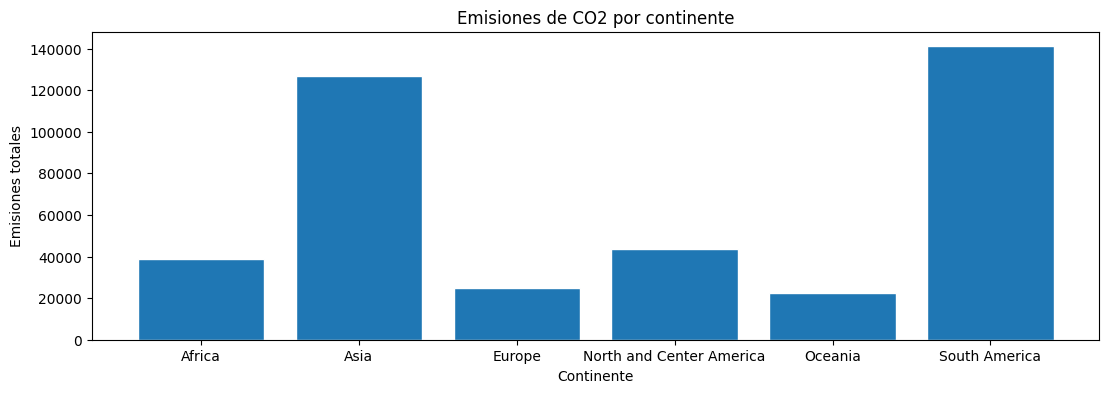

In [82]:
fig, ax = plt.subplots(figsize=(13,4))
x = emisiones_contiente.index
y = emisiones_contiente.values
ax.bar(x,y,edgecolor="white")
ax.set_xlabel('Continente')
ax.set_ylabel('Emisiones totales')
ax.set_title('Emisiones de CO2 por continente')


El gráfico presenta el total de las emisiones por continente y es curioso ver como Suramerica, continente que tiene la menor cantidad de países, presenta un nivel de emisiones mucho mayor que los demás continentes y también es interesante ver como Asia ocupa el puesto número 2, dejando atrás a Norteamerica, Africa, Europa y Oceania.

* ¿Cuál ha sido la variación de la temperatura en cada continente a lo largo de los años?

Text(0, 0.5, 'Temperatura °C')

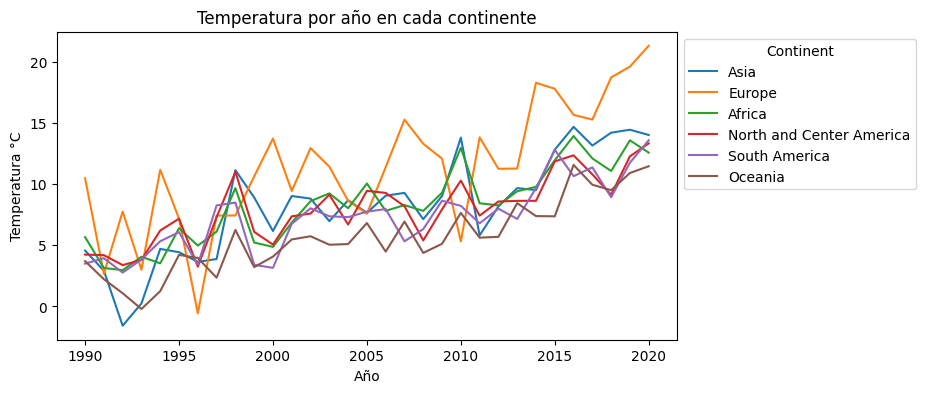

In [86]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(data=agro,x='Year',y='Average Temperature', hue='Continent', errorbar=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
plt.grid(False)
plt.title('Temperatura por año en cada continente')
plt.xlabel('Año')
plt.ylabel('Temperatura °C')

A pesar de figurar entre los países con las emisiones más bajas de CO2, Europa ha experimentado a lo largo de los años las temperaturas más elevadas en comparación con otros continentes. No obstante, esto puede ser causante de su ubicación geografica.

Adicionalmente vemos que todos los continentes presentan una alta volatilidad en su temperatura a lo largo de los años.

* ¿Existe una correlación entre la temperatura promedio y las emisiones de CO2?

Text(0, 0.5, 'Emisiones CO2 totales')

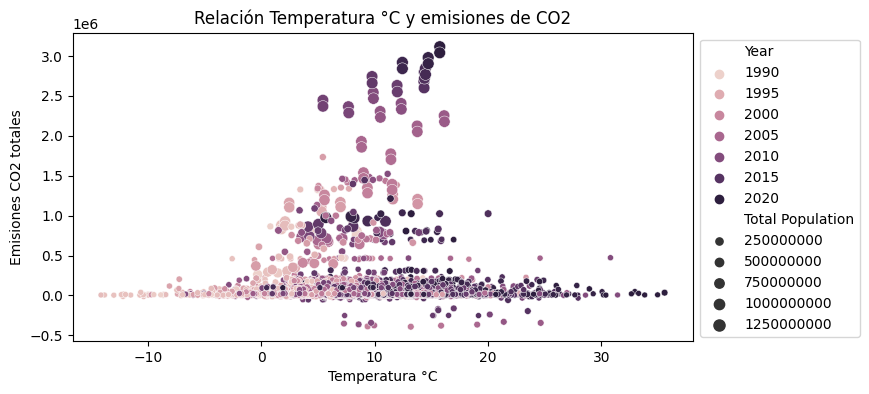

In [88]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(data=agro, x='Average Temperature', y='total_emission', hue='Year', size='Total Population')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
plt.grid(False)
plt.title('Relación Temperatura °C y emisiones de CO2')
plt.xlabel('Temperatura °C')
plt.ylabel('Emisiones CO2 totales')

El gráfico nos representa la relación de la temperatura con las emisiones de CO2 y podemos evidenciar como presentan una relación fuerte. También podemos ver como a lo largo de los años, apesar del crecimiendo de cada una de las variables, estas siguen teniendo una relación fuerte. Este análisis también subraya el impacto relevante que ejerce el tamaño total de la población en esta dinámica interrelacionada.

* ¿Cuál es la variable que más confluye con las variables principales de Temperatura y Emisiones totales?

C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


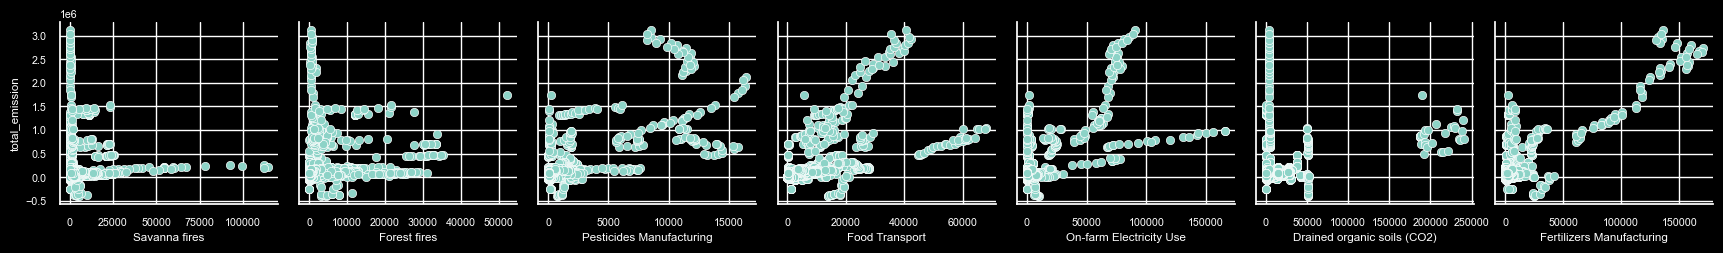

In [100]:
ax =sns.pairplot(agro, x_vars =['Savanna fires', 'Forest fires','Pesticides Manufacturing','Food Transport','On-farm Electricity Use','Drained organic soils (CO2)','Fertilizers Manufacturing'],
y_vars='total_emission')

C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


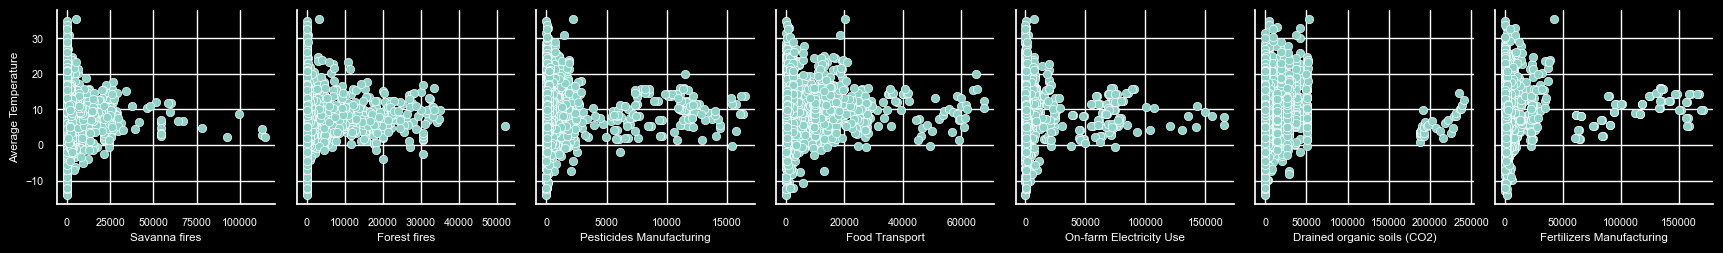

In [99]:
ax =sns.pairplot(agro, x_vars =['Savanna fires', 'Forest fires','Pesticides Manufacturing','Food Transport','On-farm Electricity Use','Drained organic soils (CO2)','Fertilizers Manufacturing'],
y_vars='Average Temperature')

Podemos ver como la variable "Food Transport" presenta una relación fuerte con las dos variables, sin embargo, se presenta una relación mucho más fuerte con la variable "Average Temperature" y puede ser una relación de significancia para futuros analisis y así obtener insights más profundos acerca de la problematica y objetivo del proyecto.

También se puede observar claramente que la variable de "Average Temperature" establece una relación más intensa con cada una de las variables.

* Outliers

Text(0, 0.5, 'Temperatura °C')

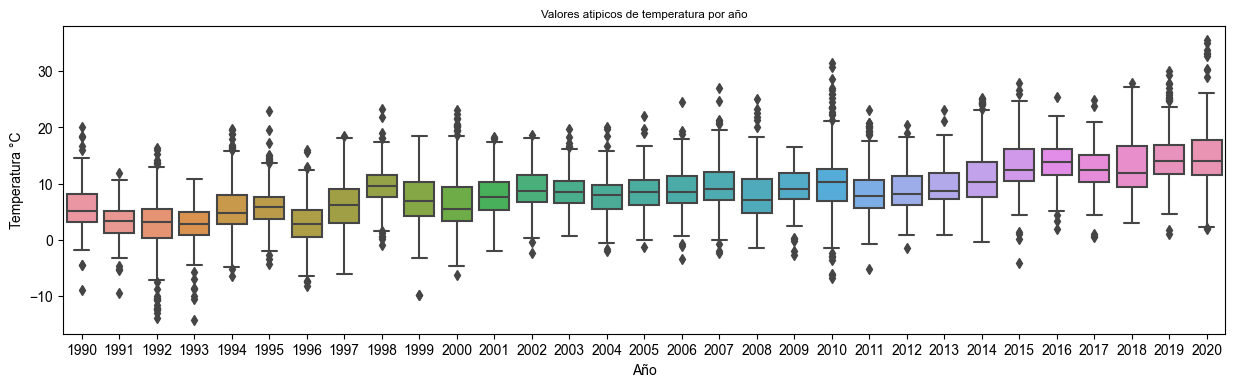

In [90]:
fig, ax = plt.subplots(figsize=(15,4))
sns.set(font_scale=0.7)
ax = sns.boxplot(data=agro, x="Year",y="Average Temperature",)
ax.set_title('Valores atipicos de temperatura por año')
ax.set_xlabel('Año')
ax.set_ylabel('Temperatura °C')

Text(0, 0.5, 'Temperatura °C')

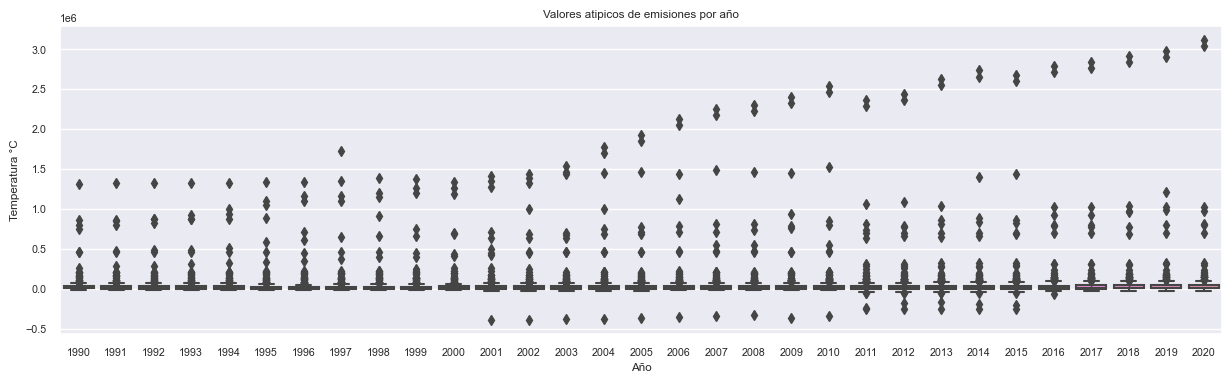

In [94]:
fig, ax = plt.subplots(figsize=(15,4))
sns.set(font_scale=0.7)
ax = sns.boxplot(data=agro, x="Year",y="total_emission")
ax.set_title('Valores atipicos de emisiones por año')
ax.set_xlabel('Año')
ax.set_ylabel('Temperatura °C')